# Лабораторна робота 5

## Виконано студенкою групи АнД-41
## Бовсуновською Марією
## Варіант 3


## Завдання
Частина 1 (частина 2 буде отримана після лекції 7)
- Виконати вирішення задачs класифікації для 3 класів з набору даних food101 з використанням різних моделей нейронних мереж:
1) CNN модель з лабораторної роботи 4
2) Resnet модель
3) Efficientnet модель (моделі 1-3 з використанням оптимізатора Adam)
4) (5) Моделі 2-3 з використанням оптимізатора SGD.
5) (6, 7)(Частина 2) Моделі 2,3 отримані за допомогою tf.keras.applications та треновані з використанням fine-tuning (останні 10 шарів)

- Індекси класів визначити індивідуально за залежностями: i1=n-1,i2=n+29,i3=n+59 (де і1,і2,і3 - індекс класу (починаючи з 0) у відсортованому за алфавітом наборі даних, n - номер за списком групи

- Порівняти результати моделювання із використанням TensorBoard
- Графік(и) порівняння результатів завантажити у форматі .svg та вставити у підсумковий файл поряд із та відповідними висновками
- Результати оформити у вигляді файлу з кодом для моделювання та візуалізації у форматі .ipynb
- Результати викласти у репозиторії GitHub (папка Lab5).
- Підготуватися до захисту лабораторрної роботи (пояснення коду, відповіді на запитання за темою)

## Варіант классів: 2 32 62
## 'baklava', 'dumplings', 'macaroni_and_cheese'

- model_1 cnn Adam

- model_2 resnet Adam
- model_3 efficientnet Adam

- model_4 resnet SGV
- model_5 efficientnet SGV

- model_6 resnet last_10_trainable
- model_7 efficientnet last_10_trainable

In [1]:
# 'apple_pie',
# 'baby_back_ribs',
# 'baklava',
# 'beef_carpaccio',
# 'beef_tartare',
# 'beet_salad',
# 'beignets',
# 'bibimbap',
# 'bread_pudding',
# 'breakfast_burrito',
# 'bruschetta',
# 'caesar_salad',
# 'cannoli',
# 'caprese_salad',
# 'carrot_cake',
# 'ceviche',
# 'cheese_plate',
# 'cheesecake',
# 'chicken_curry',
# 'chicken_quesadilla',
# 'chicken_wings',
# 'chocolate_cake',
# 'chocolate_mousse',
# 'churros',
# 'clam_chowder',
# 'club_sandwich',
# 'crab_cakes',
# 'creme_brulee',
# 'croque_madame',
# 'cup_cakes',
# 'deviled_eggs',
# 'donuts',
# 'dumplings',
# 'edamame',
# 'eggs_benedict',
# 'escargots',
# 'falafel',
# 'filet_mignon',
# 'fish_and_chips',
# 'foie_gras',
# 'french_fries'
# 'french_onion_soup',
# 'french_toast',
# 'fried_calamari',
# 'fried_rice',
# 'frozen_yogurt',
# 'garlic_bread',
# 'gnocchi',
# 'greek_salad',
# 'grilled_cheese_sandwich',
# 'grilled_salmon',
# 'guacamole',
# 'gyoza',
# 'hamburger',
# 'hot_and_sour_soup',
# 'hot_dog',
# 'huevos_rancheros',
# 'hummus',
# 'ice_cream',
# 'lasagna',
# 'lobster_bisque',
# 'lobster_roll_sandwich',
# 'macaroni_and_cheese',
# 'macarons',
# 'miso_soup',
# 'mussels',
# 'nachos',
# 'omelette',
# 'onion_rings',
# 'oysters',
# 'pad_thai',
# 'paella',
# 'pancakes',
# 'panna_cotta',
# 'peking_duck',
# 'pho',
# 'pizza',
# 'pork_chop',
# 'poutine',
# 'prime_rib',
# 'pulled_pork_sandwich',
# 'ramen',
# 'ravioli',
# 'red_velvet_cake',
# 'risotto',
# 'samosa',
# 'sashimi',
# 'scallops',
# 'seaweed_salad',
# 'shrimp_and_grits',
# 'spaghetti_bolognese',
# 'spaghetti_carbonara',
# 'spring_rolls',
# 'steak',
# 'strawberry_shortcake',
# 'sushi',
# 'tacos',
# 'takoyaki',
# 'tiramisu',
# 'tuna_tartare',
# 'waffles',


In [2]:
import numpy as np
import random as rd
import tensorflow as tf

np.random.seed(0)
rd.seed(0)
tf.random.set_seed(0)
seed=0

import pandas as pd
from keras.utils import np_utils
from pandas_ml import ConfusionMatrix


import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

variant=['baklava', 'dumplings', 'macaroni_and_cheese']

In [4]:
import os
import matplotlib.image as mpimg
import pathlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D,Flatten,Dense
import datetime
import tensorflow_hub as hub


In [5]:
root_dir = 'maria_food'

for dirpath, dirnames, filenames in os.walk(root_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

data_dir = pathlib.Path(root_dir+"/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

There are 2 directories and 0 images in 'maria_food'.
There are 3 directories and 0 images in 'maria_food\test'.
There are 0 directories and 75 images in 'maria_food\test\baklava'.
There are 0 directories and 75 images in 'maria_food\test\dumplings'.
There are 0 directories and 75 images in 'maria_food\test\macaroni_and_cheese'.
There are 3 directories and 0 images in 'maria_food\train'.
There are 0 directories and 250 images in 'maria_food\train\baklava'.
There are 0 directories and 250 images in 'maria_food\train\dumplings'.
There are 0 directories and 250 images in 'maria_food\train\macaroni_and_cheese'.
['baklava' 'dumplings' 'macaroni_and_cheese']


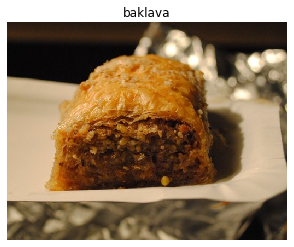

Image shape: (398, 512, 3)


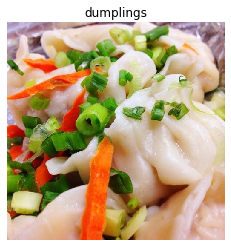

Image shape: (512, 512, 3)


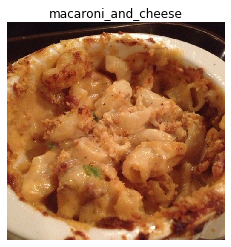

Image shape: (512, 512, 3)


In [6]:
# View an image

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = rd.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  plt.show()

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

for i in class_names:
  img = view_random_image(target_dir=root_dir+"/train/",
                        target_class=i)

In [7]:
# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = root_dir+"/train/"
test_dir =  root_dir+"/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=25, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="categorical", # type of problem we're working on
                                               )

test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=25,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               )



Found 750 images belonging to 3 classes.
Found 225 images belonging to 3 classes.


In [8]:
epochs=3
IMAGE_SHAPE=(224,224)

# Create tensorboard callback (functionized because need to create a new one for each model)

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

resnet_url="https://tfhub.dev/google/imagenet/resnet_v1_101/feature_vector/5"
efficientnet_url="https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [12]:


model_1 = tf.keras.models.Sequential([
  Conv2D(filters=10, 
            kernel_size=3, # can also be (3, 3)
            activation="relu", 
            input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(), # padding can also be 'same'
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  MaxPool2D(),
  Flatten(),
  Dense(3, activation="softmax") # categorical activation output
])

model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


In [13]:
 model_1.fit(train_data,
            epochs=epochs,
            # steps_per_epoch=len(train_data),
            validation_data=test_data,
            # validation_steps=len(test_data)
            callbacks=[create_tensorboard_callback(dir_name="tensorboard_callback", experiment_name="CNN_Adam")]
             
            )

Saving TensorBoard log files to: tensorboard_callback/CNN_Adam/20211118-102015
Epoch 1/3
30/30 [==============================] - 59s 2s/step - loss: 1.0882 - accuracy: 0.4160 - val_loss: 0.9347 - val_accuracy: 0.5911
Epoch 2/3
30/30 [==============================] - 50s 2s/step - loss: 0.8856 - accuracy: 0.5893 - val_loss: 0.8244 - val_accuracy: 0.6489
Epoch 3/3
30/30 [==============================] - 46s 2s/step - loss: 0.7768 - accuracy: 0.6427 - val_loss: 0.8060 - val_accuracy: 0.6667


In [14]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28090)            

In [15]:

model_2 = tf.keras.Sequential([
                hub.KerasLayer(resnet_url, # use the feature extraction layer as the base
                                trainable=False, # freeze the underlying patterns
                                name='feature_extraction_layer',
                                input_shape=IMAGE_SHAPE+(3,)), # define the input image shape, 
                Dense(3, activation="softmax", name='output_layer') # categorical activation output
    
])
# resnet Adam
model_2.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

In [16]:

model_2.fit(train_data, 
        epochs=epochs, 
        validation_data=test_data, 
        callbacks=[create_tensorboard_callback(dir_name="tensorboard_callback", experiment_name="resnet_Adam")]
)

Saving TensorBoard log files to: tensorboard_callback/resnet_Adam/20211118-102317
Epoch 1/3
30/30 [==============================] - 254s 7s/step - loss: 0.6914 - accuracy: 0.7240 - val_loss: 0.3636 - val_accuracy: 0.8844
Epoch 2/3
30/30 [==============================] - 191s 6s/step - loss: 0.1828 - accuracy: 0.9400 - val_loss: 0.3190 - val_accuracy: 0.9067
Epoch 3/3
30/30 [==============================] - 189s 6s/step - loss: 0.1181 - accuracy: 0.9640 - val_loss: 0.3057 - val_accuracy: 0.9067


In [18]:
model_3 = tf.keras.Sequential([
                hub.KerasLayer(efficientnet_url , # use the feature extraction layer as the base
                                trainable=False, # freeze the underlying patterns
                                name='feature_extraction_layer',
                                input_shape=IMAGE_SHAPE+(3,)), # define the input image shape, 
                Dense(3, activation="softmax", name='output_layer') # categorical activation output
    
])
# efficientnet Adam
model_3.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)
model_3.fit(train_data, 
        epochs=epochs, 
        validation_data=test_data, 
        callbacks=[create_tensorboard_callback(dir_name="tensorboard_callback", experiment_name="efficientnet_Adam")]
)

Saving TensorBoard log files to: tensorboard_callback/efficientnet_Adam/20211118-104336
Epoch 1/3
30/30 [==============================] - 148s 3s/step - loss: 0.6904 - accuracy: 0.7387 - val_loss: 0.4531 - val_accuracy: 0.8667
Epoch 2/3
30/30 [==============================] - 71s 2s/step - loss: 0.2485 - accuracy: 0.9400 - val_loss: 0.3208 - val_accuracy: 0.9022
Epoch 3/3
30/30 [==============================] - 132s 4s/step - loss: 0.1750 - accuracy: 0.9533 - val_loss: 0.2784 - val_accuracy: 0.9067


In [19]:
model_4 = tf.keras.Sequential([
                hub.KerasLayer(resnet_url , # use the feature extraction layer as the base
                                trainable=False, # freeze the underlying patterns
                                name='feature_extraction_layer',
                                input_shape=IMAGE_SHAPE+(3,)), # define the input image shape, 
                Dense(3, activation="softmax", name='output_layer') # categorical activation output
    
])
# efficientnet Adam
model_4.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.SGD(), 
    metrics=['accuracy']
)
model_4.fit(train_data, 
        epochs=epochs, 
        validation_data=test_data, 
        callbacks=[create_tensorboard_callback(dir_name="tensorboard_callback", experiment_name="resnet_SGD")]
)

Saving TensorBoard log files to: tensorboard_callback/resnet_SGD/20211118-104951
Epoch 1/3
30/30 [==============================] - 283s 8s/step - loss: 0.4123 - accuracy: 0.8347 - val_loss: 0.3686 - val_accuracy: 0.8711
Epoch 2/3
30/30 [==============================] - 216s 7s/step - loss: 0.1691 - accuracy: 0.9387 - val_loss: 0.3551 - val_accuracy: 0.8889
Epoch 3/3
30/30 [==============================] - 241s 8s/step - loss: 0.1263 - accuracy: 0.9640 - val_loss: 0.3441 - val_accuracy: 0.8933


In [20]:
model_5 = tf.keras.Sequential([
                hub.KerasLayer(efficientnet_url , # use the feature extraction layer as the base
                                trainable=False, # freeze the underlying patterns
                                name='feature_extraction_layer',
                                input_shape=IMAGE_SHAPE+(3,)), # define the input image shape, 
                Dense(3, activation="softmax", name='output_layer') # categorical activation output
    
])
# efficientnet Adam
model_5.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.SGD(), 
    metrics=['accuracy']
)
model_5.fit(train_data, 
        epochs=epochs, 
        validation_data=test_data, 
        callbacks=[create_tensorboard_callback(dir_name="tensorboard_callback", experiment_name="efficientnet_SGD")]
)

Saving TensorBoard log files to: tensorboard_callback/efficientnet_SGD/20211118-110311
Epoch 1/3
30/30 [==============================] - 164s 4s/step - loss: 0.7217 - accuracy: 0.7480 - val_loss: 0.5638 - val_accuracy: 0.8711
Epoch 2/3
30/30 [==============================] - 72s 2s/step - loss: 0.4070 - accuracy: 0.9107 - val_loss: 0.4334 - val_accuracy: 0.8844
Epoch 3/3
30/30 [==============================] - 73s 2s/step - loss: 0.3145 - accuracy: 0.9213 - val_loss: 0.3737 - val_accuracy: 0.8889


In [ ]:
# # встановити history_x = model_x.fit
# pd.DataFrame(history_1.history).plot()
# pd.DataFrame(history_2.history).plot()
# pd.DataFrame(history_3.history).plot()
# pd.DataFrame(history_4.history).plot()
# pd.DataFrame(history_5.history).plot()

# Частина 2

## model_6 resnet last_10_trainable


In [10]:
model_6 = tf.keras.Sequential([
                hub.KerasLayer(resnet_url , # use the feature extraction layer as the base
                                trainable=False, # freeze the underlying patterns
                                name='feature_extraction_layer',
                ),
                                # input_shape=IMAGE_SHAPE+(3,)), # define the input image shape, 
                Dense(3, activation="softmax", name='output_layer') # categorical activation output
    
])
for i in model_6.layers[-10:]:
    i.trainable=True
model_6.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)
history_6=model_6.fit(train_data, 
        epochs=epochs, 
        validation_data=test_data, 
        callbacks=[create_tensorboard_callback(dir_name="tensorboard_callback", experiment_name="resnet_10_adam")]
)







Saving TensorBoard log files to: tensorboard_callback/resnet_10_adam/20211202-095936
Epoch 1/3
30/30 [==============================] - 1517s 49s/step - loss: 1.1551 - accuracy: 0.7213 - val_loss: 8528918.0000 - val_accuracy: 0.3333
Epoch 2/3
30/30 [==============================] - 1291s 43s/step - loss: 0.8945 - accuracy: 0.7960 - val_loss: 13196.0518 - val_accuracy: 0.3333
Epoch 3/3
30/30 [==============================] - 1301s 44s/step - loss: 0.7199 - accuracy: 0.8627 - val_loss: 17.8477 - val_accuracy: 0.3333


## model_7 efficientnet last_10_trainable

In [11]:
model_7 = tf.keras.Sequential([
                hub.KerasLayer(efficientnet_url , # use the feature extraction layer as the base
                                trainable=False, # freeze the underlying patterns
                                name='feature_extraction_layer',
                                input_shape=IMAGE_SHAPE+(3,)), # define the input image shape, 
                Dense(3, activation="softmax", name='output_layer') # categorical activation output
    
])

for i in model_7.layers[-10:]:
    i.trainable=True
model_7.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.SGD(), 
    metrics=['accuracy']
)
history_7=model_7.fit(train_data, 
        epochs=epochs, 
        validation_data=test_data, 
        callbacks=[create_tensorboard_callback(dir_name="tensorboard_callback", experiment_name="efficientnet_10_adam")]
)

Saving TensorBoard log files to: tensorboard_callback/efficientnet_10_adam/20211202-110926
Epoch 1/3
30/30 [==============================] - 374s 10s/step - loss: 1.0431 - accuracy: 0.5947 - val_loss: 0.8546 - val_accuracy: 0.7244
Epoch 2/3
30/30 [==============================] - 315s 11s/step - loss: 0.7401 - accuracy: 0.8373 - val_loss: 0.6614 - val_accuracy: 0.8444
Epoch 3/3
30/30 [==============================] - 275s 9s/step - loss: 0.5884 - accuracy: 0.8853 - val_loss: 0.5537 - val_accuracy: 0.8667


In [ ]:
# pd.DataFrame(history_6.history).plot()
# pd.DataFrame(history_7.history).plot()